In [1]:
from useful_scit.imps import * 
from checkSST_funs import *

In [2]:
pathTest = '/proj/atm/saltena/runs/run_2019_04_03_1/wrf2'
pathCont = '/proj/atm/saltena/runs/run_2019_02_28_2/wrf' # as in control 
paths = (pathTest,pathCont)

In [3]:
dfT = get_file_list(pathTest)
doms = ['d01','d02','d03','d04']

In [ ]:
outF1={}
merge={}
for d in doms:
    outFs = get_specific_files([['kind','wrfout'],['dom',d]],dfT)

    outF1[d] = outFs[::12].copy()
    outF1[d]['sst'] = outF1[d].apply(lambda r: get_sst_ttcc(r),axis=1)
    merge[d] = xr.merge(outF1[d].sst.values)

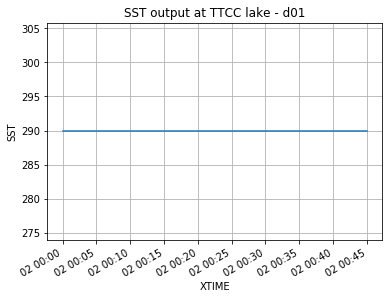

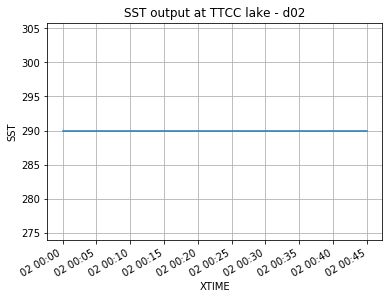

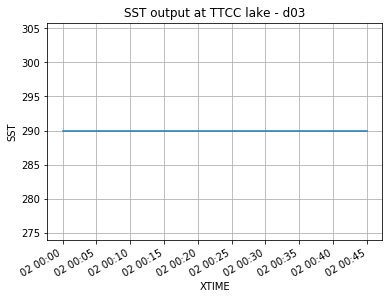

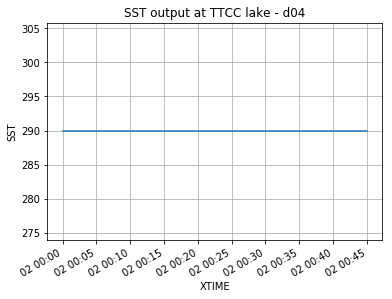

In [8]:
for d in doms:
    plt.subplots()
    l2ds = merge[d].SST.median(dim=['south_north','west_east']).plot()
    l2d = l2ds[0]
    l2d.axes.set_title('SST output at TTCC lake - {}'.format(d))
    l2d.axes.grid(True)